<a href="https://colab.research.google.com/github/jimmyQuigeeAnalytics/Unsupervised-Learning/blob/main/Fantasy_Sports_Clustering_Analysis_Using_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fantasy Sports Clustering Analysis  Using Hierarchical Clustering

#### Overview

**Client:** OnSports  
**Industry:** Online Fantasy Sports  
**Objective:** Determine optimal player pricing for the upcoming English Premier League season using cluster analysis on historical data.

#### Background

Fantasy sports platforms like OnSports allow users to assemble virtual teams of real sports players. Players earn points based on the real-life performance of these players. The industry, valued at 18.6 billion in 2019 and projected to reach $48.6 billion by 2027, thrives on the digitization and global accessibility provided by smartphones and dedicated apps.

#### Challenge

OnSports needs to accurately set player prices for the upcoming season to enhance user engagement and competition fairness. Prices must reflect players' potential, based on their previous performances, to ensure a balanced and competitive game environment.

#### Data Description

- **Player_Name:** Name of the player
- **Club:** Club for the player
- **Position:** Player's position
- **Goals_Scored:** Goals scored last season
- **Assists:** Assists last season
- **Total_Points:** Total fantasy points last season
- **Minutes:** Minutes played last season
- **Goals_Conceded:** Goals conceded by the player's team while on the field
- **Creativity, Influence, Threat:** Scores evaluating different aspects of game impact
- **Bonus:** Bonus points based on match performance
- **Clean_Sheets:** Number of matches without conceding a goal

#### Expected Outcomes

- **Cluster Profiles:** Detailed descriptions of player segments based on performance metrics which can guide pricing.
- **Pricing Recommendations:** A structured pricing model for players categorized by their performance cluster.
- **Strategic Insights:** Insights on player performance trends that can influence future platform enhancements and marketing strategies.

#### Deliverables

- **Comprehensive Report:** Document detailing methodology, analyses, cluster profiles, and pricing recommendations.
- **Presentation:** Slides for stakeholders explaining the analysis, findings, and suggested actions.
- **Data Visualizations:** Graphs and charts that illustrate data distributions, cluster distinctions, and pricing strategy implications.

#### Timeline

- **Week 1-2:** Data preparation and EDA
- **Week 3:** Clustering analysis and model validation
- **Week 4:** Development of pricing recommendations and report preparation
- **Week 5:** Presentation and final adjustments based on stakeholder feedback

This case study aims to optimize player pricing to increase competitiveness and engagement on the OnSports platform, leveraging advanced analytics to drive strategic decisions in the rapidly growing fantasy sports market.

### Importing the Necessary Libraries and Overview of the Dataset

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

In [103]:
# Load the dataset
data = pd.read_csv("fpl_data.csv")

# Display the first few rows of the dataset to understand its structure and content
data.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2


The dataset has been loaded and contains information about players participating in fantasy football. Here's a brief overview of the columns:

- **Player_Name**: Name of the player.
- **Club**: Club for the player.
- **Position**: Player's position.
- **Goals_Scored**: Goals scored last season.
- **Assists**: Assists last season.
- **Total_Points**: Total fantasy points last season.
- **Minutes**: Minutes played last season.
- **Goals_Conceded**: Goals conceded by the player's team while on the field.
- **Creativity, Influence, Threat**: Scores evaluating different aspects of game impact.
- **Bonus**: Bonus points based on match performance.
- **Clean_Sheets**: Number of matches without conceding a goal.

In [104]:
data.shape

(476, 13)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


In [106]:
data.describe()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,1.907563,1.752101,58.516807,1336.909664,19.157563,195.976050,294.617647,224.962185,4.718487,4.745798
std,3.455562,2.708563,51.293559,1073.773995,15.946171,251.478541,267.779681,318.240377,6.252625,4.394312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,268.750000,4.000000,8.300000,46.500000,5.750000,0.000000,0.000000
50%,0.500000,0.000000,48.000000,1269.500000,18.000000,96.950000,233.100000,104.500000,2.000000,4.000000
75%,2.000000,2.000000,94.250000,2256.250000,31.000000,296.950000,499.500000,298.250000,7.000000,8.000000
max,23.000000,14.000000,244.000000,3420.000000,68.000000,1414.900000,1318.200000,1980.000000,40.000000,19.000000


Statistical summary indicates varied distributions across different attributes such as goals, assists, and points, suggesting differing contributions from players.

### Exploratory Data Analysis

#### Univariate Analysis
Let's perform univariate analysis to understand the distribution of key variables like goals scored, assists, and total points.

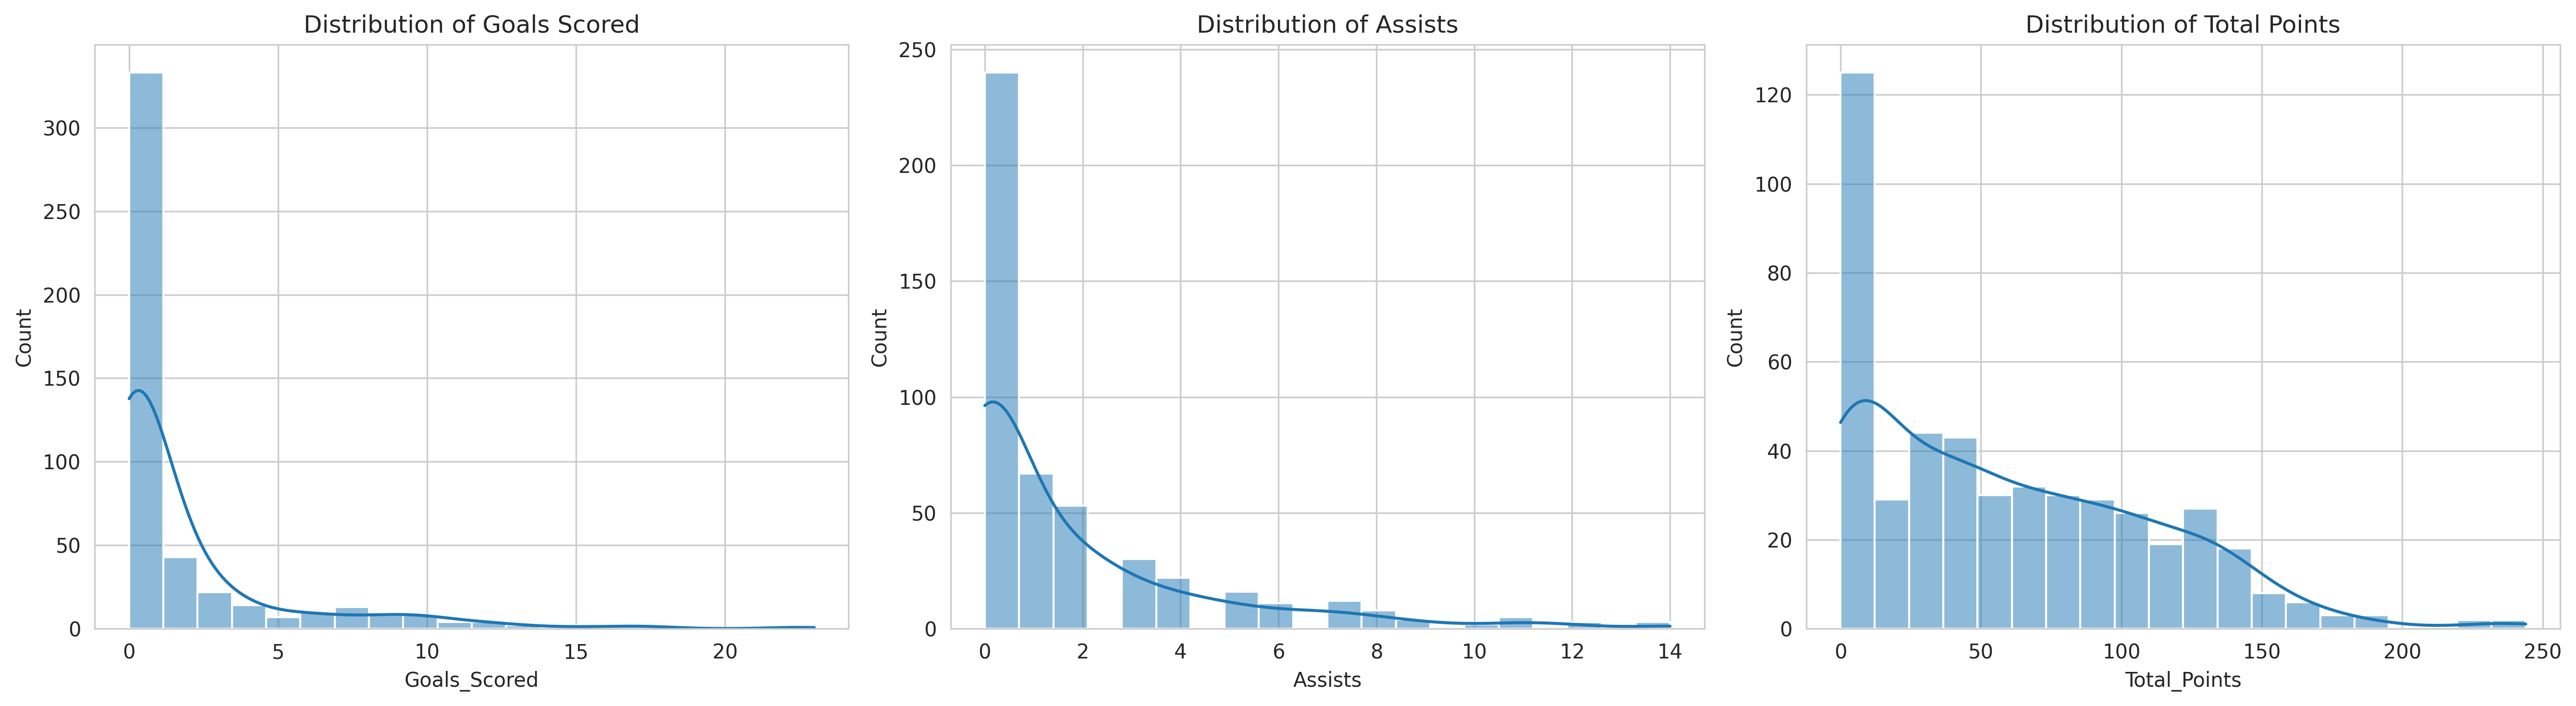

In [107]:
# Univariate analysis: Histograms for Goals_Scored, Assists, and Total_Points
fig, ax = plt.subplots(1, 3, figsize=(18, 5), dpi=300)
sns.histplot(data['Goals_Scored'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Goals Scored')

sns.histplot(data['Assists'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Assists')

sns.histplot(data['Total_Points'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Distribution of Total Points')

plt.tight_layout()
plt.show()

##### Univariate Insights
- **Goals Scored:** The majority of players score few goals, with a heavy right skew indicating that only a small number of players score a high number of goals.
- **Assists:** Similar to goals, assists are also skewed right, with most players recording few assists.
- **Total Points:** Points are also right-skewed but show a more consistent spread among players who score moderately.

#### Bivariate Analysis
Bivariate analysis will help explore relationships between key variables, such as how goals and assists correlate with total fantasy points.

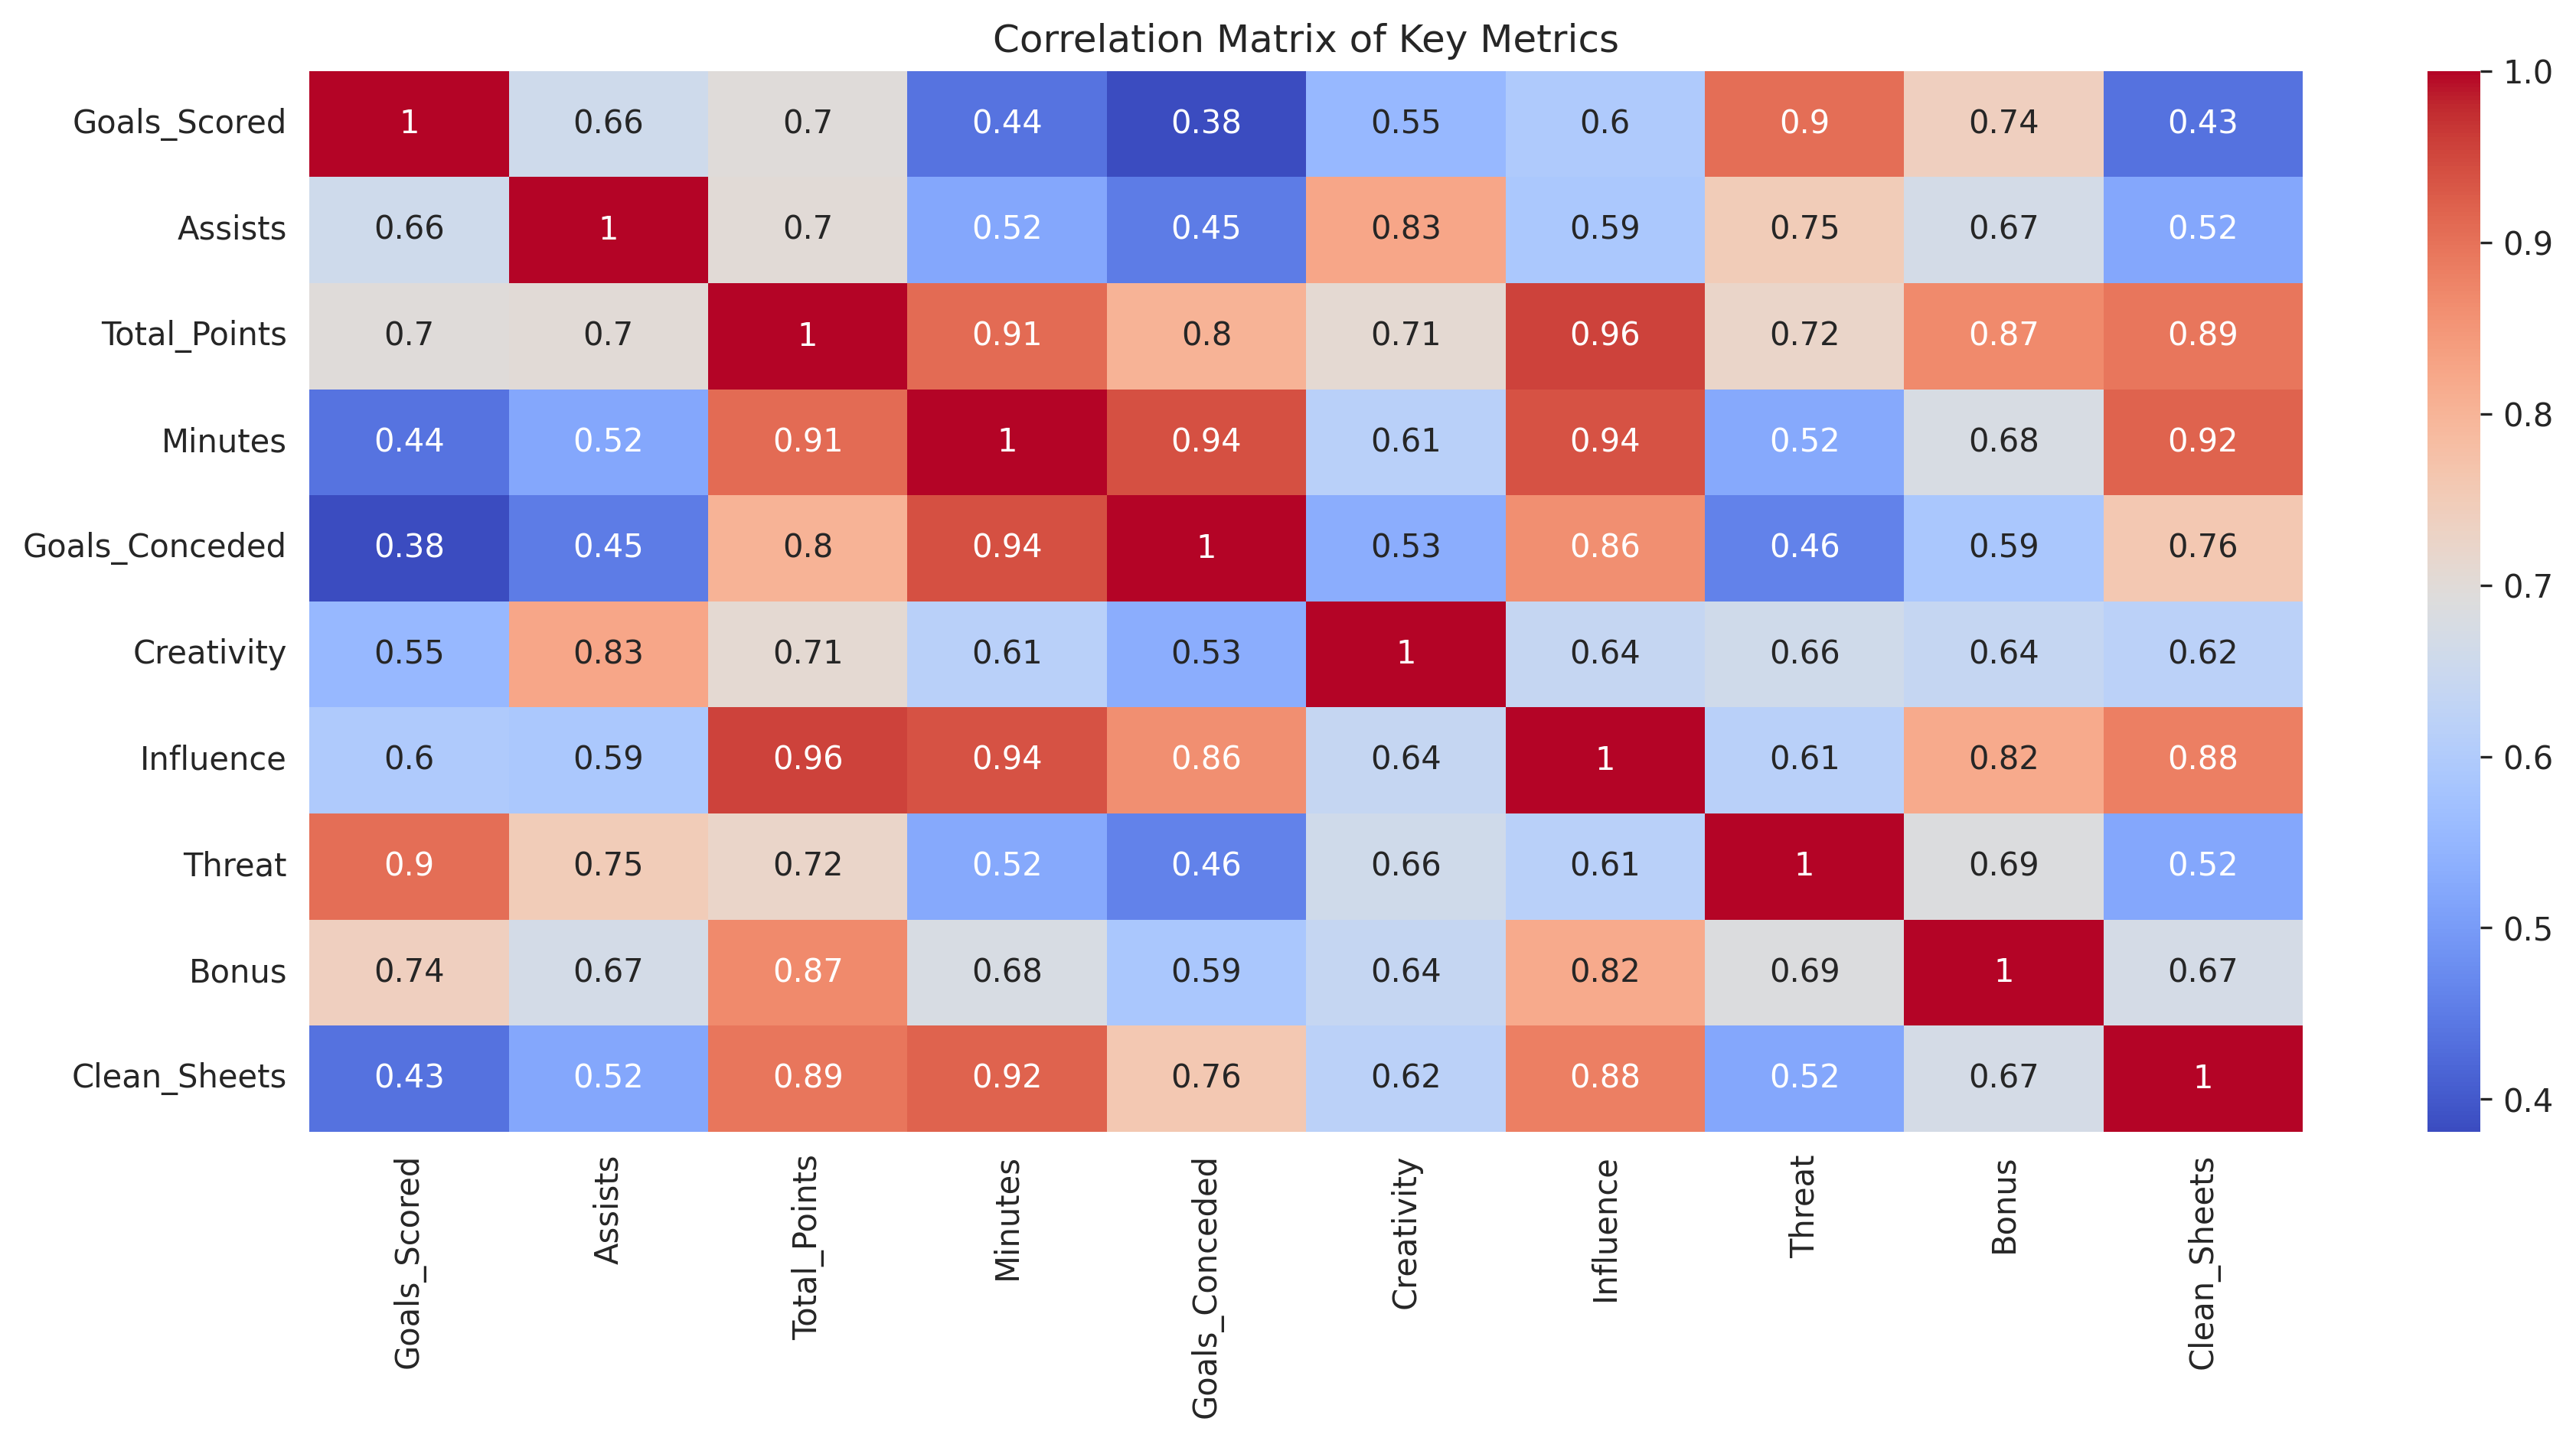

In [108]:
# Bivariate analysis: Correlation heatmap
correlation_matrix = data[['Goals_Scored', 'Assists', 'Total_Points', 'Minutes', 'Goals_Conceded', 'Creativity', 'Influence', 'Threat', 'Bonus', 'Clean_Sheets']].corr()
plt.figure(figsize=(14, 6), dpi=300)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Metrics')
plt.show()

##### Bivariate Insights
- Strong positive correlations are evident between `Total_Points` and several metrics such as `Goals_Scored`, `Assists`, `Influence`, and `Threat`. This suggests that players who score more or assist more tend to accumulate higher fantasy points.
- `Minutes` played is moderately correlated with `Total_Points`, indicating that playing time is an important factor in accumulating points.
- `Creativity`, `Influence`, and `Threat` are highly interrelated, indicating these metrics tend to increase together.

#### Outlier Check
We'll identify any outliers in the data that might affect the clustering process.

Let's identify potential outliers in key metrics which could affect the clustering process. We'll look at boxplots for `Goals_Scored`, `Assists`, and `Total_Points`.

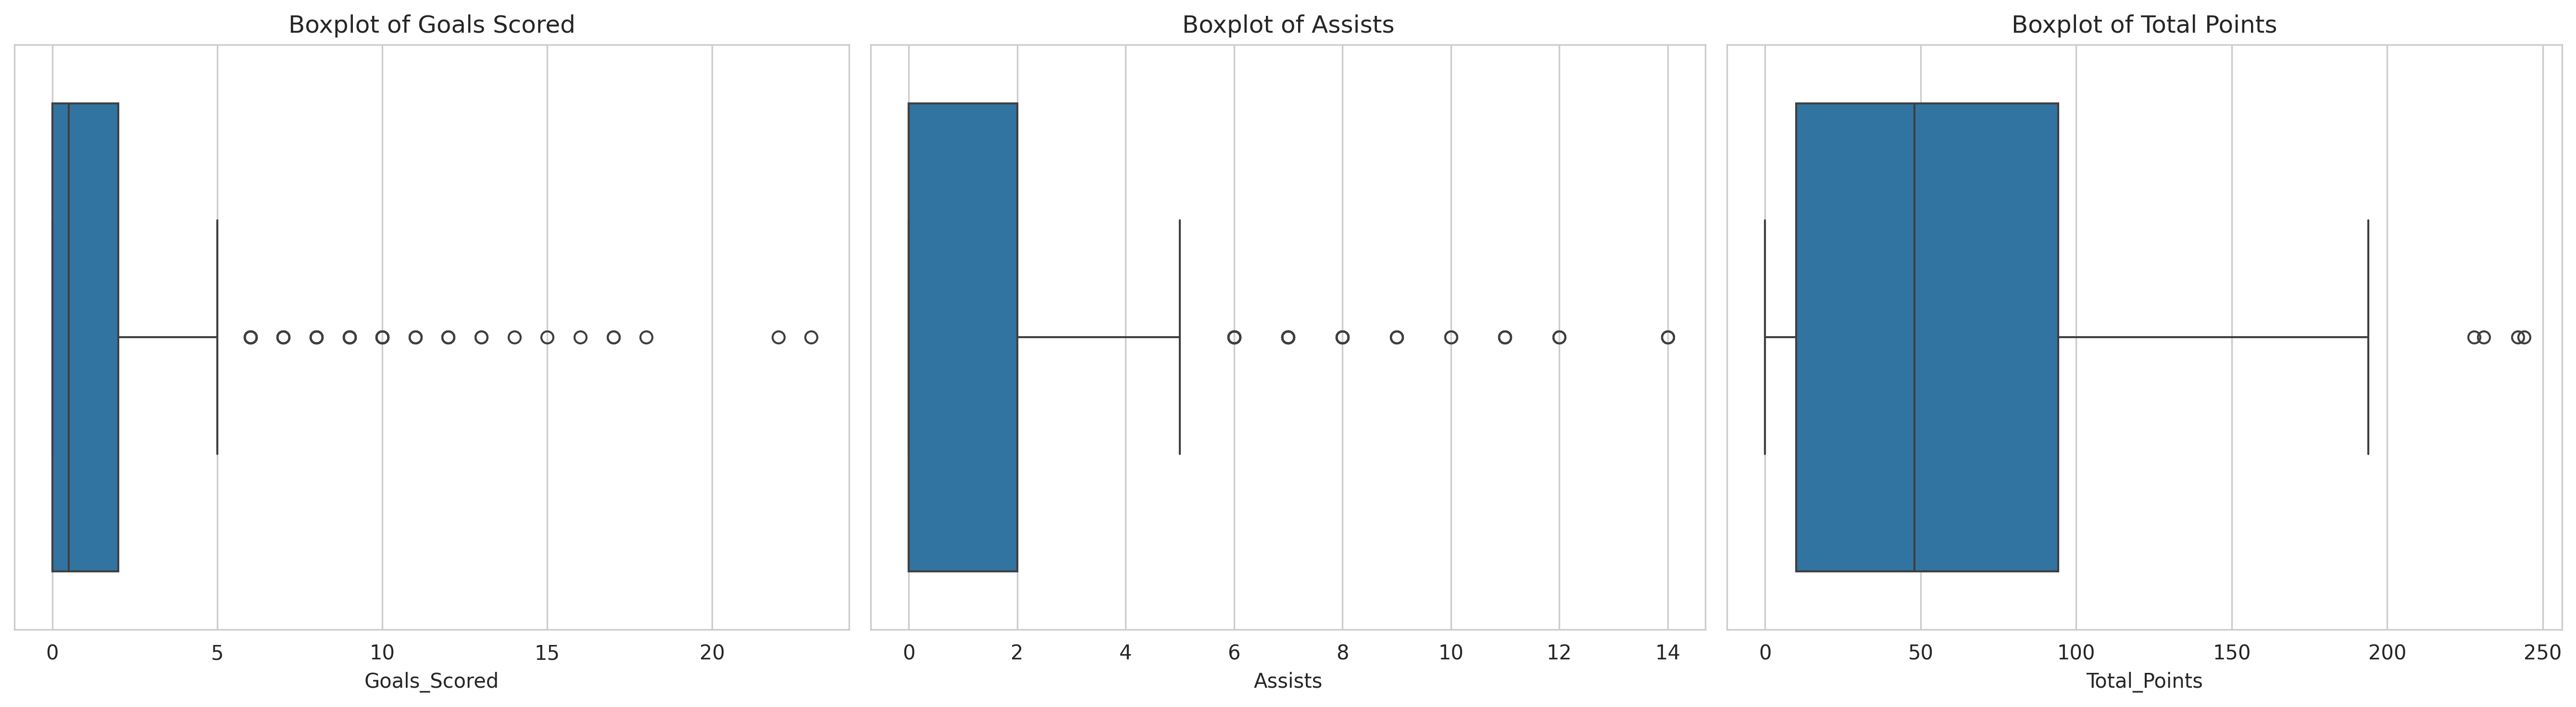

In [109]:
# Outlier check using boxplots for Goals_Scored, Assists, and Total_Points
fig, ax = plt.subplots(1, 3, figsize=(18, 5), dpi=300)
sns.boxplot(data=data, x='Goals_Scored', ax=ax[0])
ax[0].set_title('Boxplot of Goals Scored')

sns.boxplot(data=data, x='Assists', ax=ax[1])
ax[1].set_title('Boxplot of Assists')

sns.boxplot(data=data, x='Total_Points', ax=ax[2])
ax[2].set_title('Boxplot of Total Points')

plt.tight_layout()
plt.show()

##### Outlier Insights

The boxplots reveal several outliers in the dataset:
- **Goals Scored:** There are significant outliers, indicating a few players have scored exceptionally more goals than the majority.
- **Assists:** Similar to goals, there are notable outliers for assists, with a few players having much higher assists.
- **Total Points:** Several players have accumulated points well above the norm.

#### Scaling
Since clustering algorithms are sensitive to the range of data, it's essential to scale the data. We will use standard scaling, which subtracts the mean and divides by the standard deviation, ensuring each feature contributes equally to the distance computation in clustering.

In [110]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Goals_Scored', 'Assists', 'Total_Points', 'Minutes', 'Goals_Conceded', 'Creativity', 'Influence', 'Threat', 'Bonus', 'Clean_Sheets']])

#### Applying PCA
Principal Component Analysis (PCA) will be applied to reduce dimensionality while retaining variance in the data, making clustering more effective.

Let's proceed with scaling and then apply PCA.

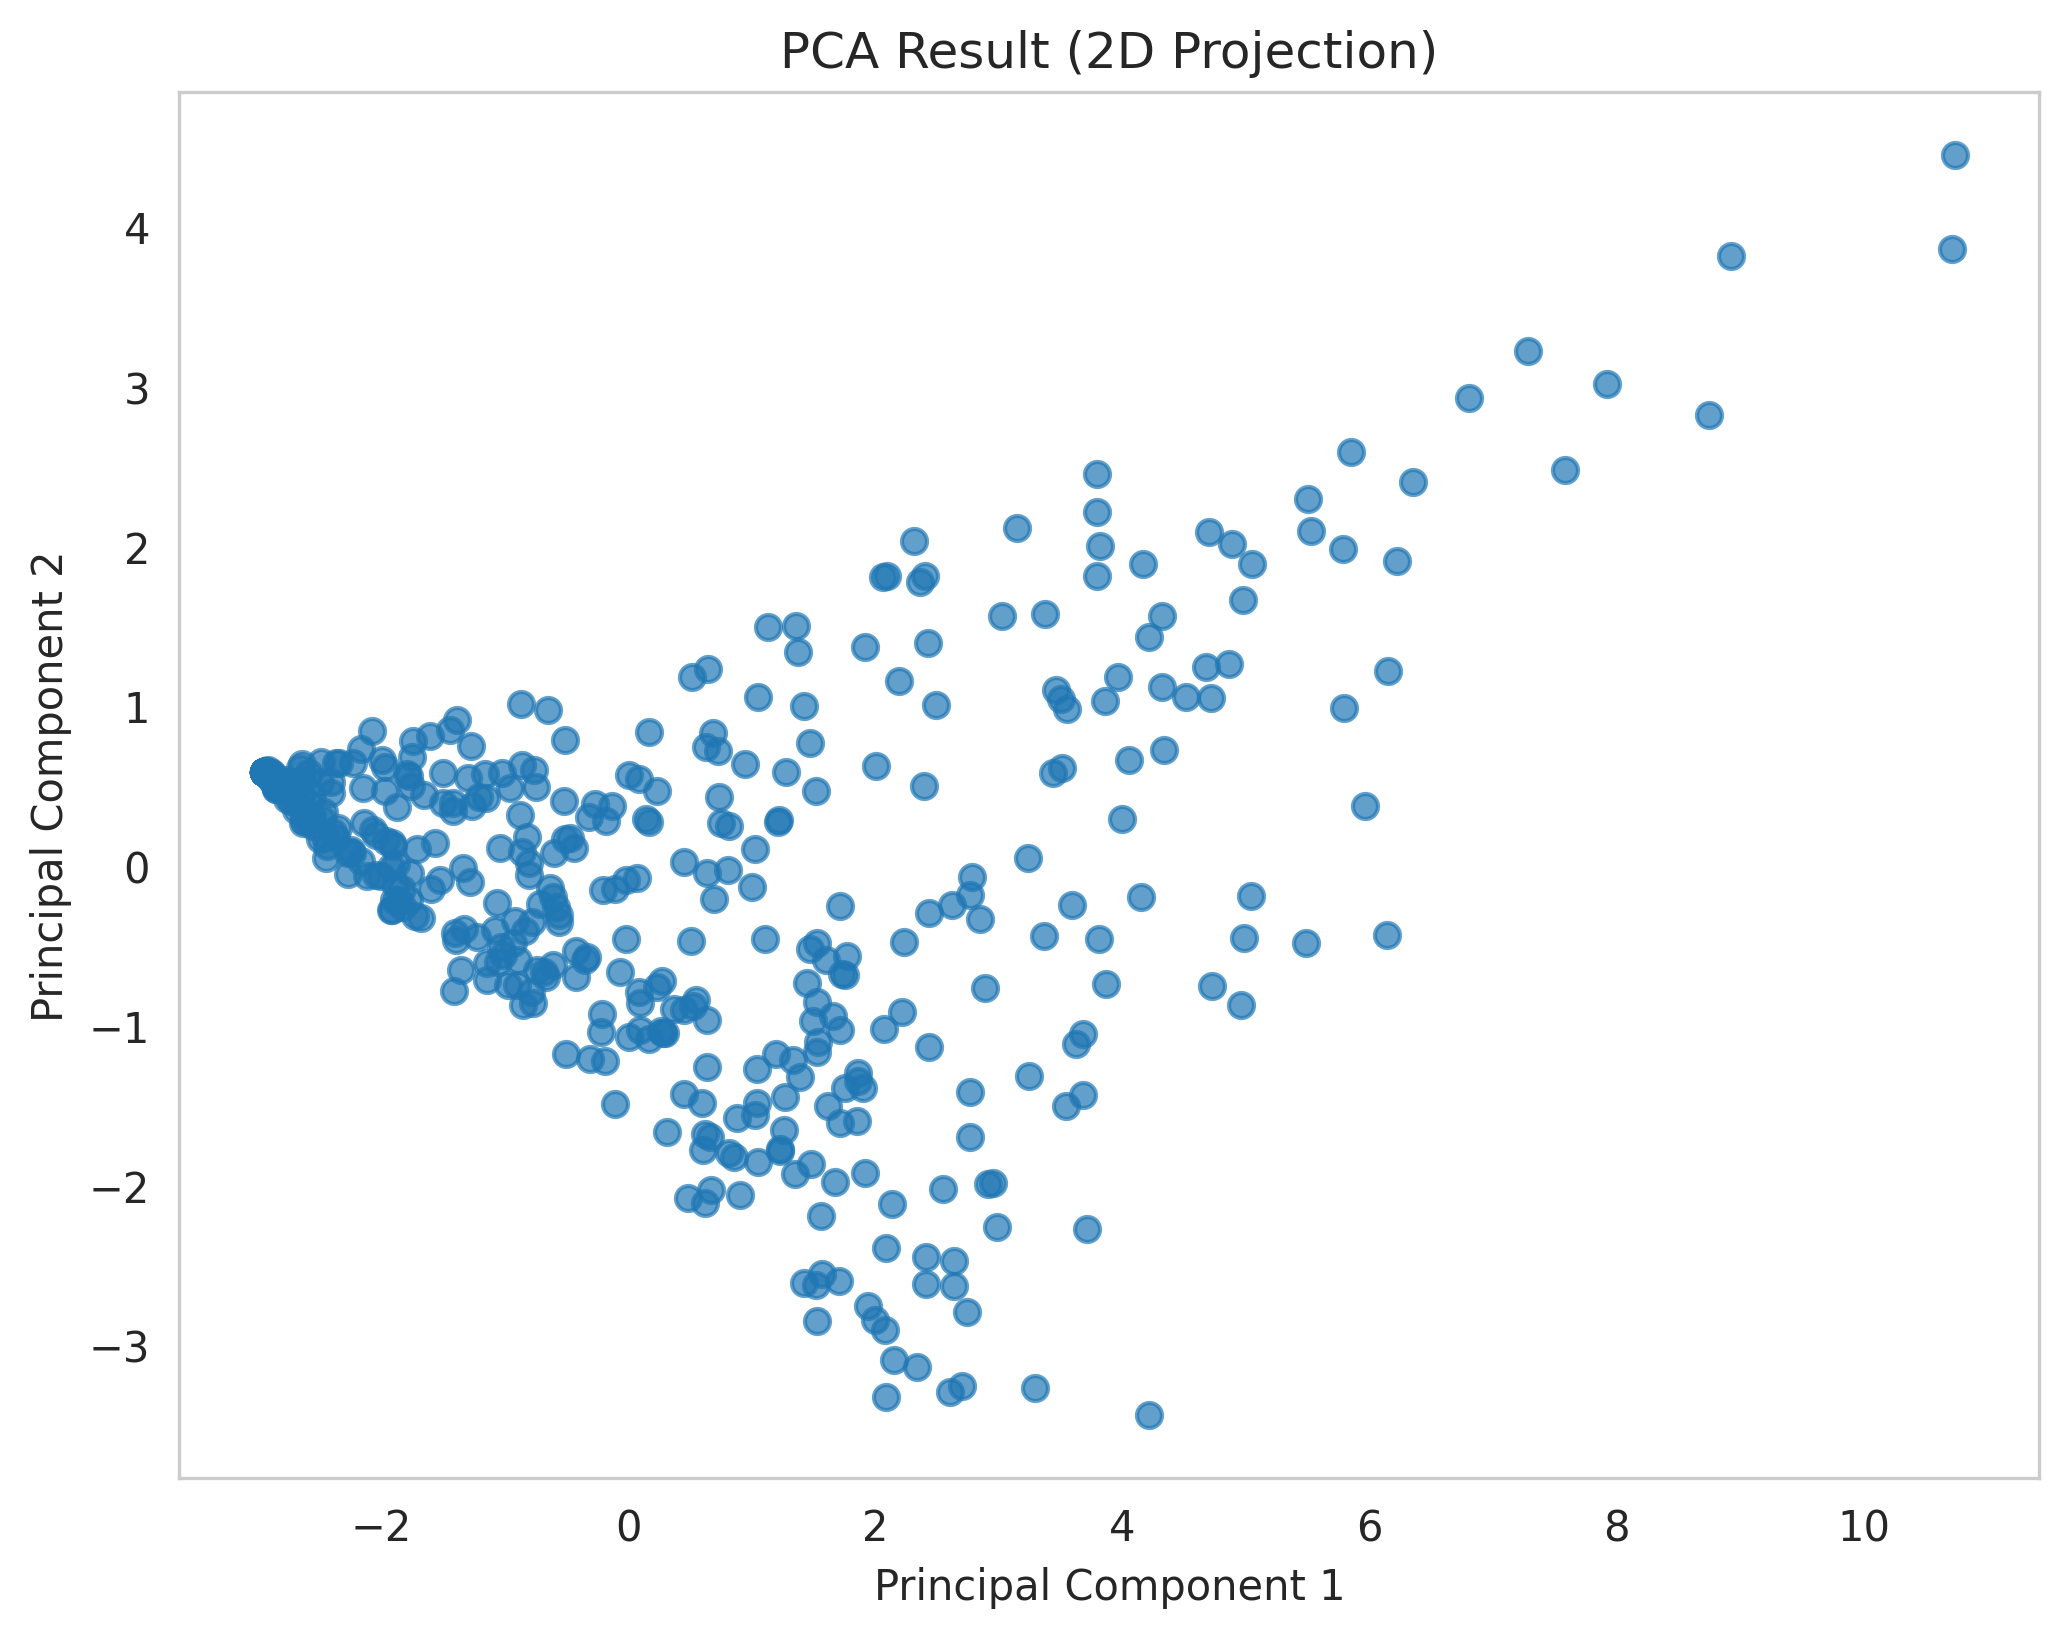

(None, array([0.72148934, 0.13659346]))

In [111]:
# Applying PCA
pca = PCA(n_components=2)  # Reduce to two components for visualization and simplicity
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the PCA results
plt.figure(figsize=(8, 6),dpi=300)
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result (2D Projection)')
plt.grid(False)
plt.show(), explained_variance

##### PCA Insights

The PCA resulted in the following:
- **Principal Component 1** explains approximately 72.1% of the variance.
- **Principal Component 2** accounts for about 13.7%.
Together, the first two components capture about 85.8% of the total variance, which is substantial, allowing us to proceed with these two dimensions for clustering.

### Hierarchical Clustering
We'll now perform hierarchical clustering on the PCA-reduced data. Hierarchical clustering is advantageous as it does not require specifying the number of clusters upfront and provides a dendrogram that helps visualize the hierarchical structure of the clusters.

#### Visualizing the Dendrogram
A dendrogram will help determine the optimal number of clusters by identifying the largest vertical distance that we can vertically cut without crossing a horizontal line (or a minimal number of horizontal lines). Let's create this visualization.

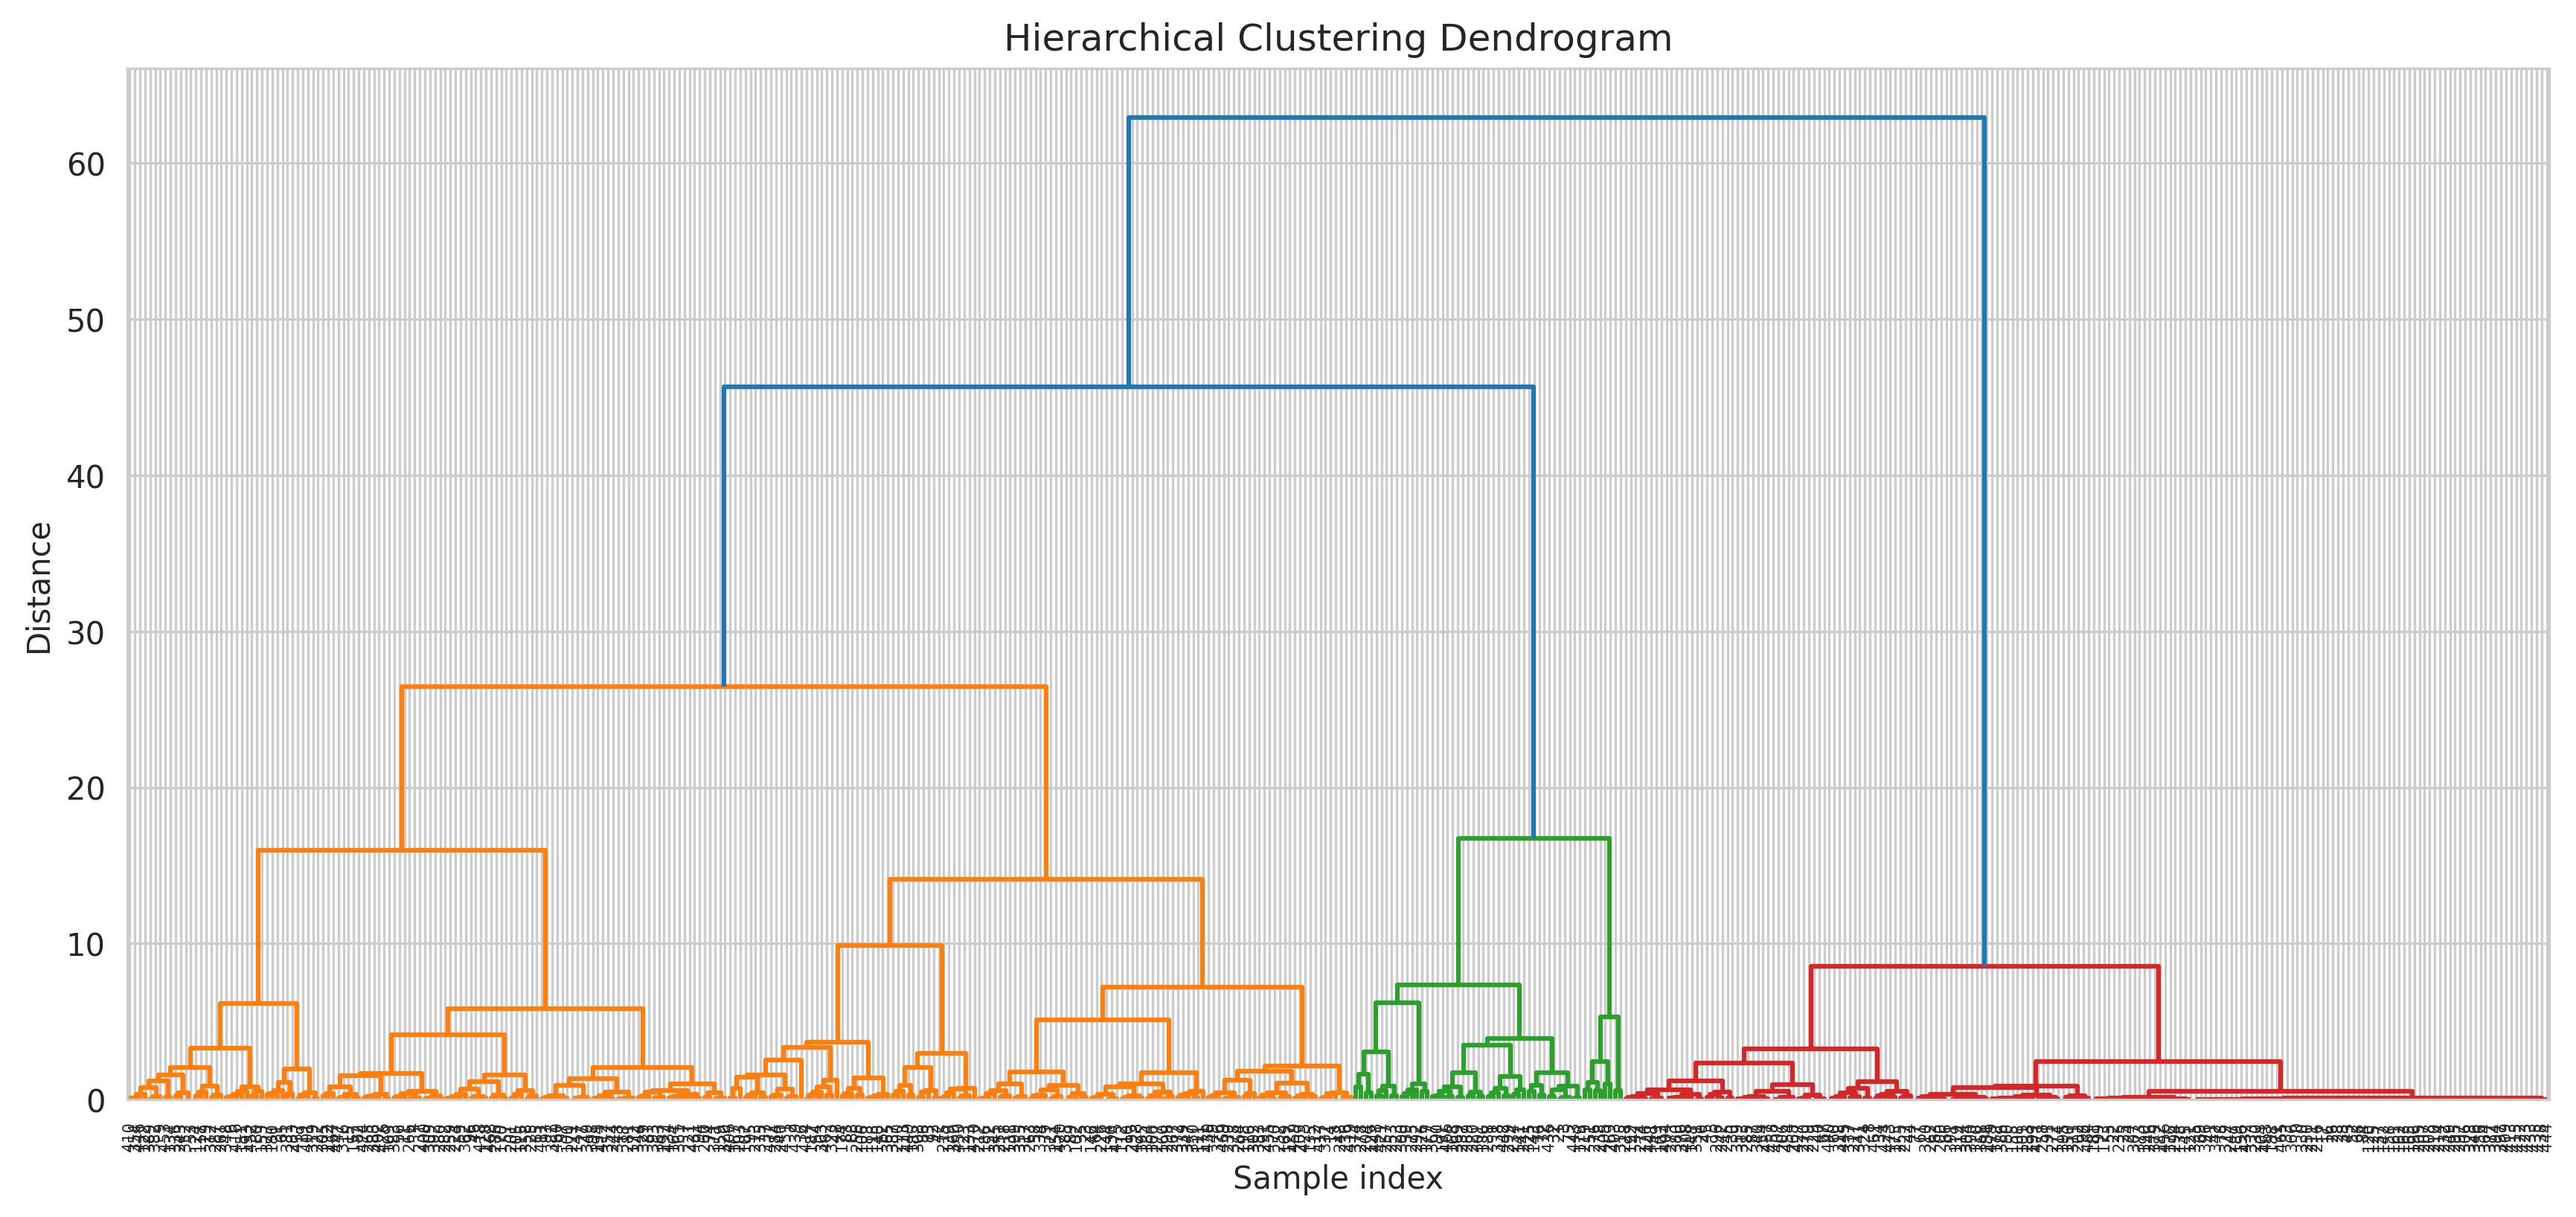

In [112]:
# Generate the linkage matrix using Ward's method
linked = linkage(pca_data, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(14, 6),dpi=300)
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

### Hierarchical Clustering Dendrogram

The dendrogram from hierarchical clustering provides a visual representation of the clustering process. The y-axis represents the distance or dissimilarity between clusters, and the x-axis represents individual data points.

### Optimal Number of Clusters
By examining the longest vertical lines not intersected by extended horizontal lines, we can estimate the number of clusters. From the dendrogram, it appears that cutting the dendrogram between distances of 20 and 30 would yield a reasonable number of clusters, approximately 3 to 4 clusters.

In [113]:
# Define the number of clusters based on dendrogram inspection
number_of_clusters = 3

### Visualizing the Clusters
Next, we'll use the identified number of clusters to label our PCA-reduced data and visualize these clusters to understand their distribution better.

Let's proceed to visualize these clusters in the 2D PCA space.

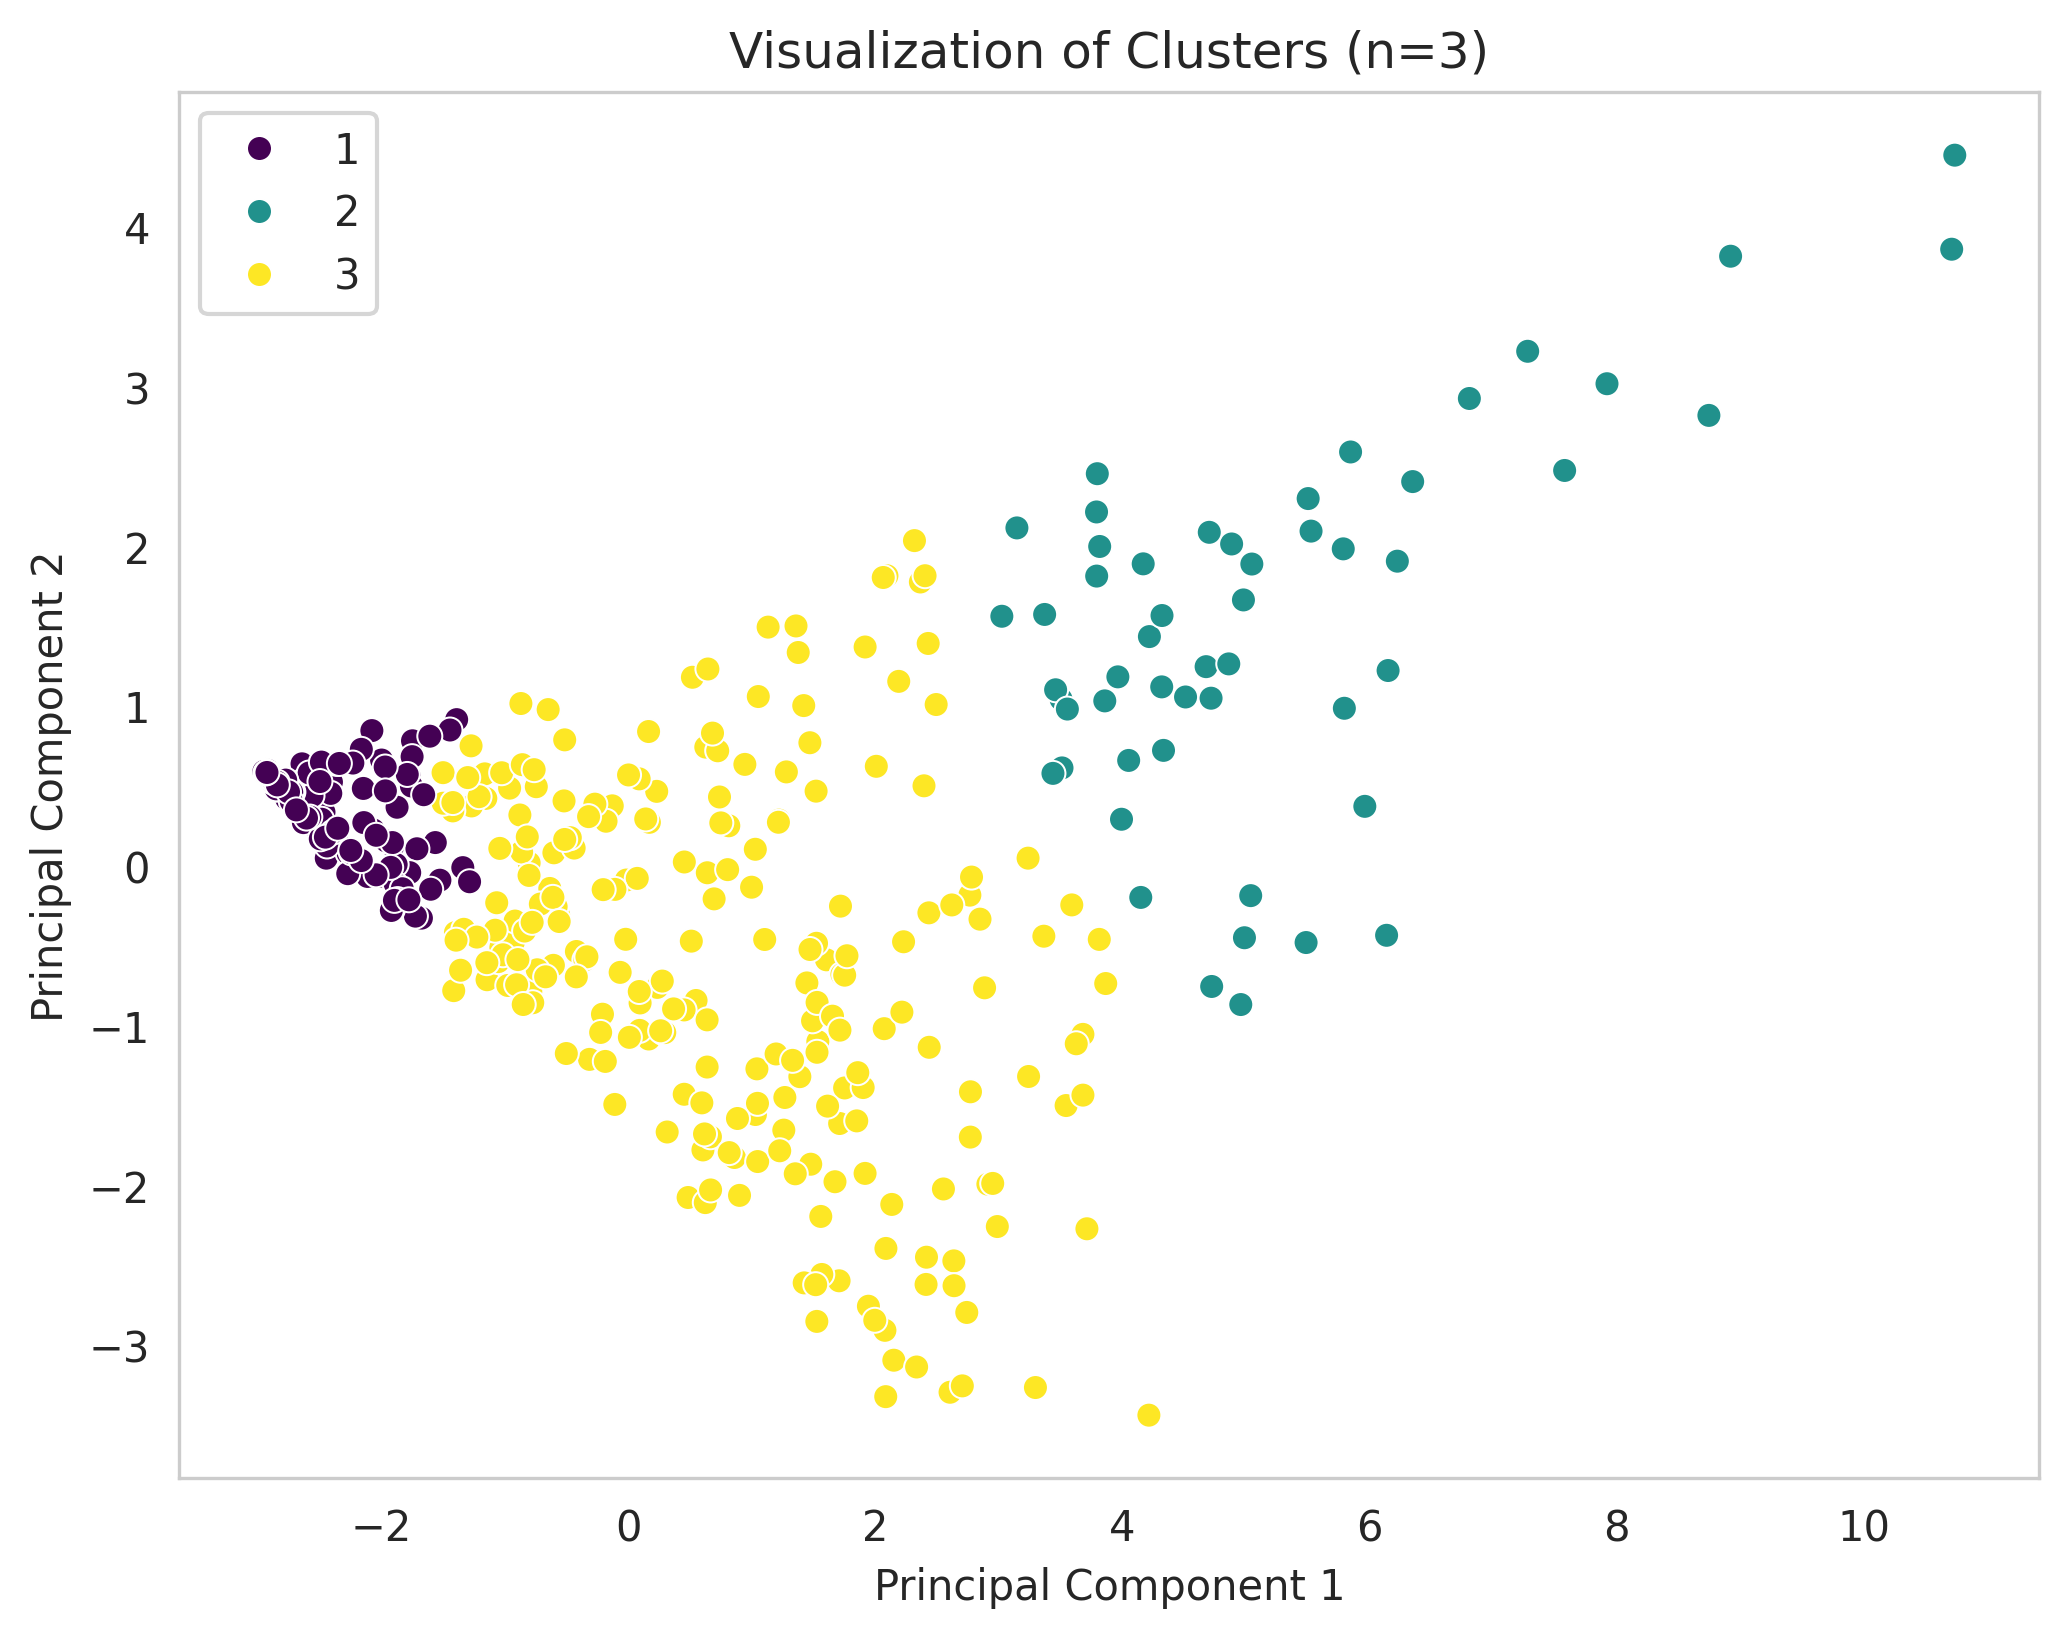

In [114]:
# Applying hierarchical clustering to dataset
clusters = fcluster(linked, number_of_clusters, criterion='maxclust')

# Plotting the clusters
plt.figure(figsize=(8, 6),dpi=300)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Visualization of Clusters (n={number_of_clusters})')
plt.grid(False)
plt.show()

### Cluster Visualization

The clusters are visualized in the 2D space defined by the first two principal components. Each color represents a different cluster, illustrating how the players are grouped based on the reduced features from PCA.

### Cluster Profiling
To provide actionable insights, we'll now profile these clusters by:
1. Assigning the cluster labels back to the original scaled data.
2. Calculating average values for key metrics within each cluster to discern distinct characteristics.

Let's proceed with profiling each cluster to understand the characteristics that define each group. This will be crucial for setting pricing strategies in the fantasy sports platform.

In [115]:
# Add the cluster labels to the original dataframe
data['Cluster'] = clusters

In [116]:
# Re-attempt to calculate mean values for each cluster excluding non-numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns
cluster_profile = data.groupby('Cluster')[numeric_columns].mean()  # Calculate mean of numeric columns only

# Display the corrected cluster profiles
cluster_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Cluster
Cluster,,,,,,,,,,,
1,0.126374,0.148352,9.071429,226.824176,3.818681,24.353846,40.658242,25.950549,0.362637,0.500000,1.0
2,9.207547,7.150943,147.094340,2594.056604,35.301887,659.116981,688.539623,920.113208,16.603774,9.905660,2.0
3,1.647303,1.775934,76.377593,1898.763485,27.190871,223.730290,399.774274,222.377593,5.394191,6.817427,3.0


### Cluster Characteristics

The profiles for each cluster based on average values of key metrics are:

#### Cluster 1
- **Low Activity Players**: These players have very low averages in goals scored, assists, and total points. Their minutes played are also quite low, indicating they are either substitutes or less frequently played members of the team.
- **Average Metrics**: Very low creativity, influence, and threat scores.
- **Bonus and Clean Sheets**: Minimal bonus points and clean sheets, supporting their limited impact on games.

#### Cluster 2
- **High-Performing Players**: This cluster features players with high averages in goals, assists, and total points. They play almost full seasons, as reflected in their high minutes.
- **Impact Metrics**: Very high creativity, influence, and threat scores, suggesting these players are likely forwards or attacking midfielders who consistently impact the game's outcome.
- **Bonus and Clean Sheets**: High bonus points and a good number of clean sheets, indicating top performers.

#### Cluster 3
- **Moderate Players**: These players have moderate values in all metrics. They play significant minutes but not as much as the high performers.
- **Average Metrics**: Moderate creativity, influence, and threat scores, likely reflecting a mix of midfielders and defenders.
- **Bonus and Clean Sheets**: Moderate bonuses and a fair number of clean sheets.

### Conclusion
The hierarchical clustering effectively segmented the players into three distinct groups:
1. **Reserves or low-impact players**
2. **Key players or stars of the team**
3. **Regular, consistent performers**

### Recommendations
Based on the clustering analysis, pricing strategies can be devised as follows:
- **Cluster 1 (Reserves)**: Lower price points to reflect their limited game time and impact.
- **Cluster 2 (Stars)**: Premium pricing for these players due to their high impact and ability to earn points.
- **Cluster 3 (Regulars)**: Moderately priced to reflect their consistent, though not extraordinary, contributions.

These differentiated pricing strategies can help OnSports optimize engagement and competition by encouraging strategic team compositions among users. Regular monitoring and adjustment based on ongoing season performance will be essential for maintaining balance and competitiveness in the platform.